# Lab Assigment

1. Perform classification on the MNIST dataset using an ANN model

2. You are permitted to conduct exploration of,

    * Preprocessing methods

    * Feature selection

    * ANN architecture

    * Activation functions

3. The ANN is implemented using TensorFlow.

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


## Load Dataset

In [2]:
# Load MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


## Preprocessing

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## Build ANN Model

In [6]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Compile

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## Training Model

In [8]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9219 - loss: 0.2656 - val_accuracy: 0.9563 - val_loss: 0.1459
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9651 - loss: 0.1127 - val_accuracy: 0.9663 - val_loss: 0.1104
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9766 - loss: 0.0760 - val_accuracy: 0.9700 - val_loss: 0.0983
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9826 - loss: 0.0556 - val_accuracy: 0.9726 - val_loss: 0.0923
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9709 - val_loss: 0.1009
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9883 - loss: 0.0355 - val_accuracy: 0.9722 - val_loss: 0.1003
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0285 - val_accuracy: 0.9740 - val_loss: 0.1010
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9912 - loss: 0.0255 -

## Model Evaluation

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0856
Test Accuracy: 0.979200005531311


## Loss and Accuracy

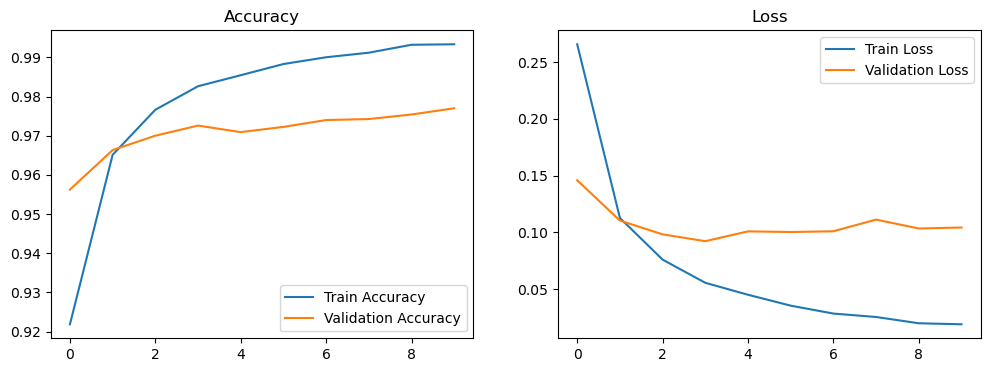

In [10]:
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.show()


## Predict

In [12]:
sample = X_test[0].reshape(1, 784)
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)

print("Predict:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predict: 7


The MNIST handwritten digit dataset was classified using an Artificial Neural Network (ANN) built with TensorFlow. The images were preprocessed by normalizing pixel values from 0–255 to 0–1, and all 784 features from each 28×28 image were used directly as input. The ANN architecture consisted of an input layer, two hidden Dense layers using ReLU activation, and an output layer with softmax for 10 digit classes. After training for 10 epochs, the model achieved strong performance with a training accuracy of 99.33%, validation accuracy of 97.70%, and final test accuracy of 97.92%. A sample prediction also showed the model correctly identifying the digit “7,” demonstrating that the ANN successfully learned to classify handwritten digits.